<table align="center" width="100%">
    <tr>
        <td width="30%">
            <img src="https://datascientest.com/en/wp-content/uploads/sites/9/2023/10/feature-engineering.webp">
        </td>
        <td>
            <div align="center">
                <font color="#7F0542" size="6">
                    <b>Feature Engineering - 01</b>
                </font>
            </div>
        </td>
    </tr>
</table>

## <font color='red'>**Please note that any topics that are not covered in today's lecture will be covered in the next lecture.**</font>

## <font color='blue'>**Content**</font>

- Feature Engineering
- Skewness
- Kurtosis
- Univariate Analysis
- Continuous to Categorical (Binning)
- Creating new features  

## <font color='blue'>**Feature Engineering**</font>

If we look, the first thing that comes to our mind is what is feature?  

Let's understand it with the help of the example that we solved earlier.

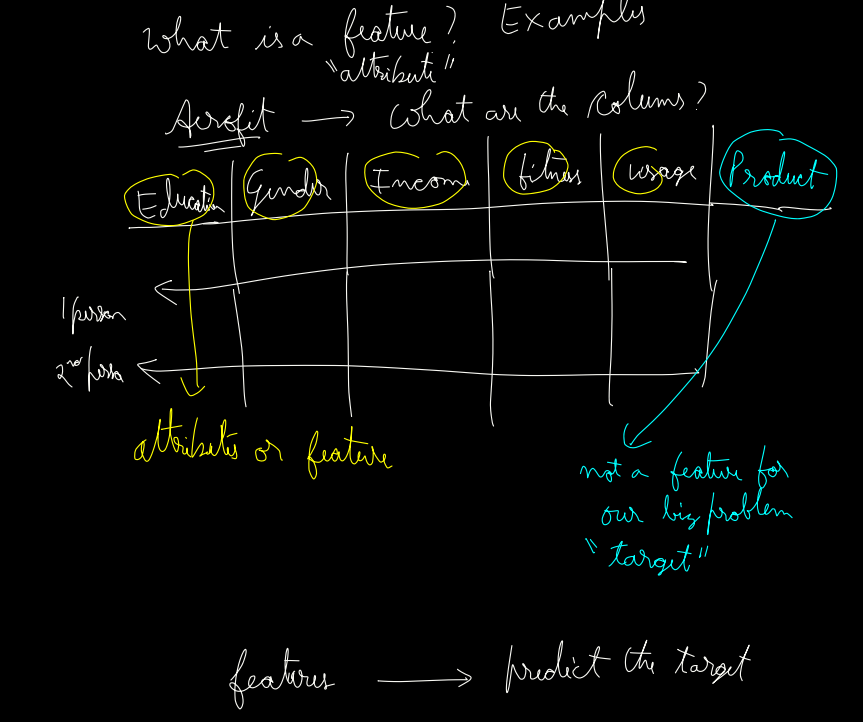

- Here the idea is like If we want to know that here the person is a graduate, Gender is Male, Earns X amount, fitness is Y, usage is Z  

- Then which product he's most likely to buy?  

- One person occupies an entire row, second person occupies another entire row but what is the column giving about that person?  

Each column is giving me some attribute or feature about that person.

From these attributes, we are expected to predict which is the best product for that customer.

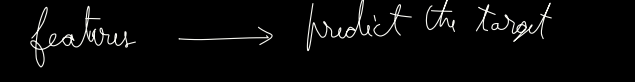

In ML the most important idea is if you are given features can you able to predict the target?  

> Let's start with a simple example

##### <font color='purple'>**Fitness Example**</font>

```
I want to know whether the person is fit or not?
```  

For this, we'll do a small survey and in that survey, we'll ask people for their **weight** and **height**.  

- Unfortunately, we don't know the ideal height and weight considered to be fit but we need to predict it what can we do?  

<font color='orange'>**Solution:**</font>

- We'll take the survey and ask the expert. He'll label the data. **Fit** will be represented by **1** and **Non-fit** will be by **0**  
- We have the data, now my goal is to come up with an algorithm which can predict whether the person is fit or not.  

> We'll ask some questions first


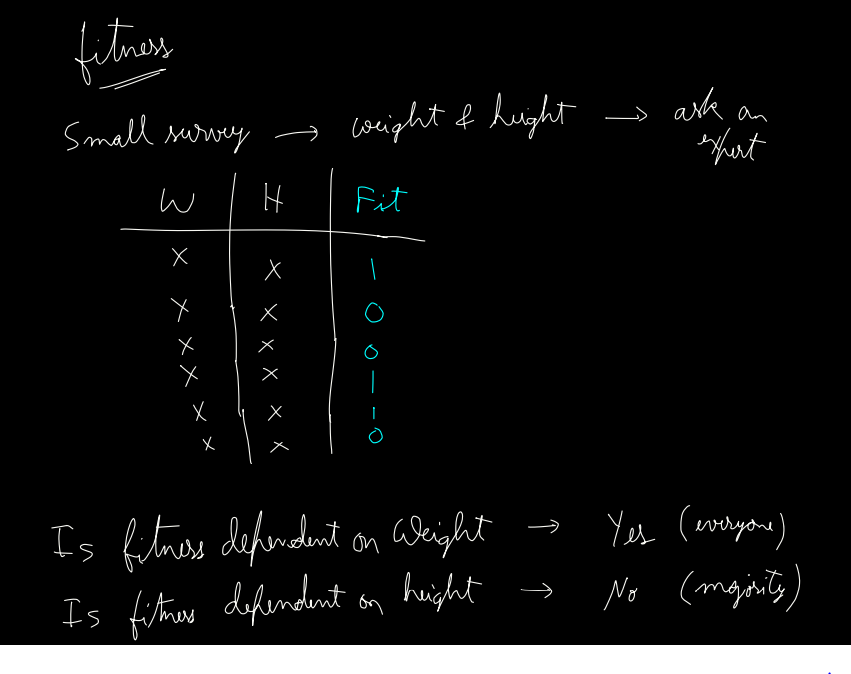

- Now suppose you send this data to a data scientist but you forget to send the column headings of the data  

- Now how'll he figure out which column is which and which column represents which one?  

- If we plot the weight and height graph we'll get to know that if you only give weight or height then it won't be enough to predict whether the person is fit or not  

- For that, we need a mechanism.

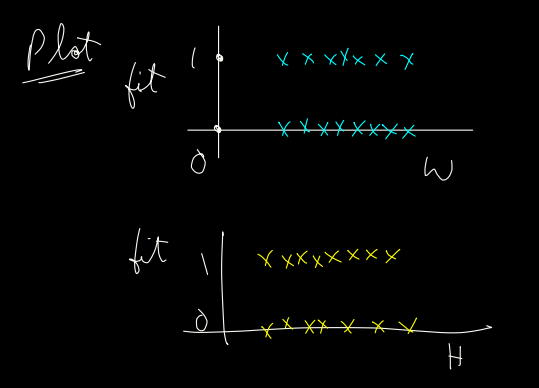

Many of you said **BMI** which stands for **Body Mass Index**.  

- BMI = $\Large \frac{weight}{Height^2}$  

Now based on our weight and height data we can compute BMI and introduce a **new column/feature** which now has a huge impact in predicting whether the person is fit or not.   

<font color='purple'>So, this kind of creating a new column is a classic example of "**Feature Engineering**".</font>

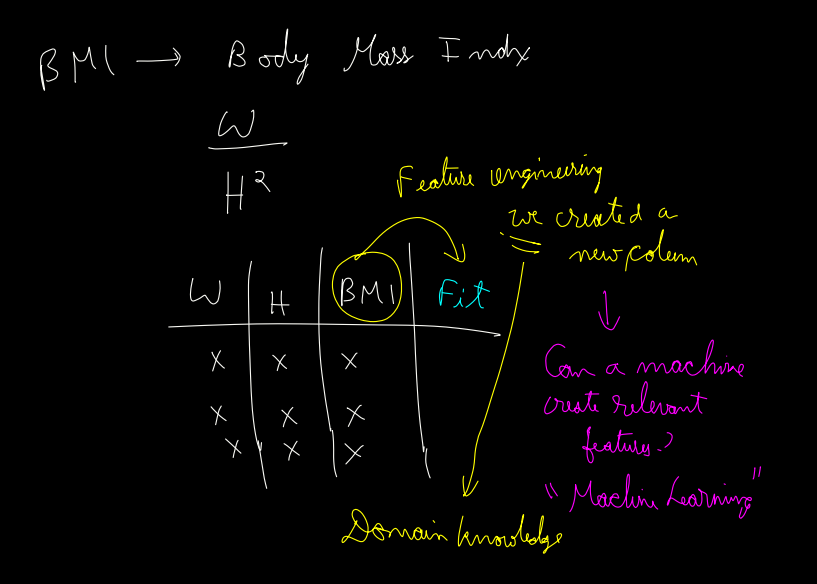

In ML the challenge is "Can a machine create a relevant feature". This comes under Machine Learning.
You'll see it later in the ML module.  

Today we'll focus on creating new columns using our domain knowledge and the best data scientist knows how to use domain knowledge and how to use Machine Learning.

### <font color='purple'> **Loan Status Example** </font>


Here we'll have features like Gender, Married, Income, etc and based on these features we have to predict our target column which is **Loan Status**.


In [ ]:
# impoting libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [ ]:
!wget --no-check-certificate https://drive.google.com/uc?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc -O loan.csv

--2024-01-18 10:12:21--  https://drive.google.com/uc?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc
Resolving drive.google.com (drive.google.com)... 173.194.206.100, 173.194.206.102, 173.194.206.139, ...
Connecting to drive.google.com (drive.google.com)|173.194.206.100|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://drive.usercontent.google.com/download?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc [following]
--2024-01-18 10:12:21--  https://drive.usercontent.google.com/download?id=15B0YXLJhx41faA2rVyifWMjlmpuFqAxc
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 142.251.6.132, 2607:f8b0:4001:c5a::84
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|142.251.6.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 38011 (37K) [application/octet-stream]
Saving to: ‘loan.csv’

loan.csv            100%[===================>]  37.12K  --.-KB/s    in 0.001s  

2024-01-18 10:12:21 (50.7 MB/s) - ‘loa

In [ ]:
data = pd.read_csv('/content/loan.csv')
data.shape

(614, 13)

<font color='purple'> **Dataset Description:**</font>

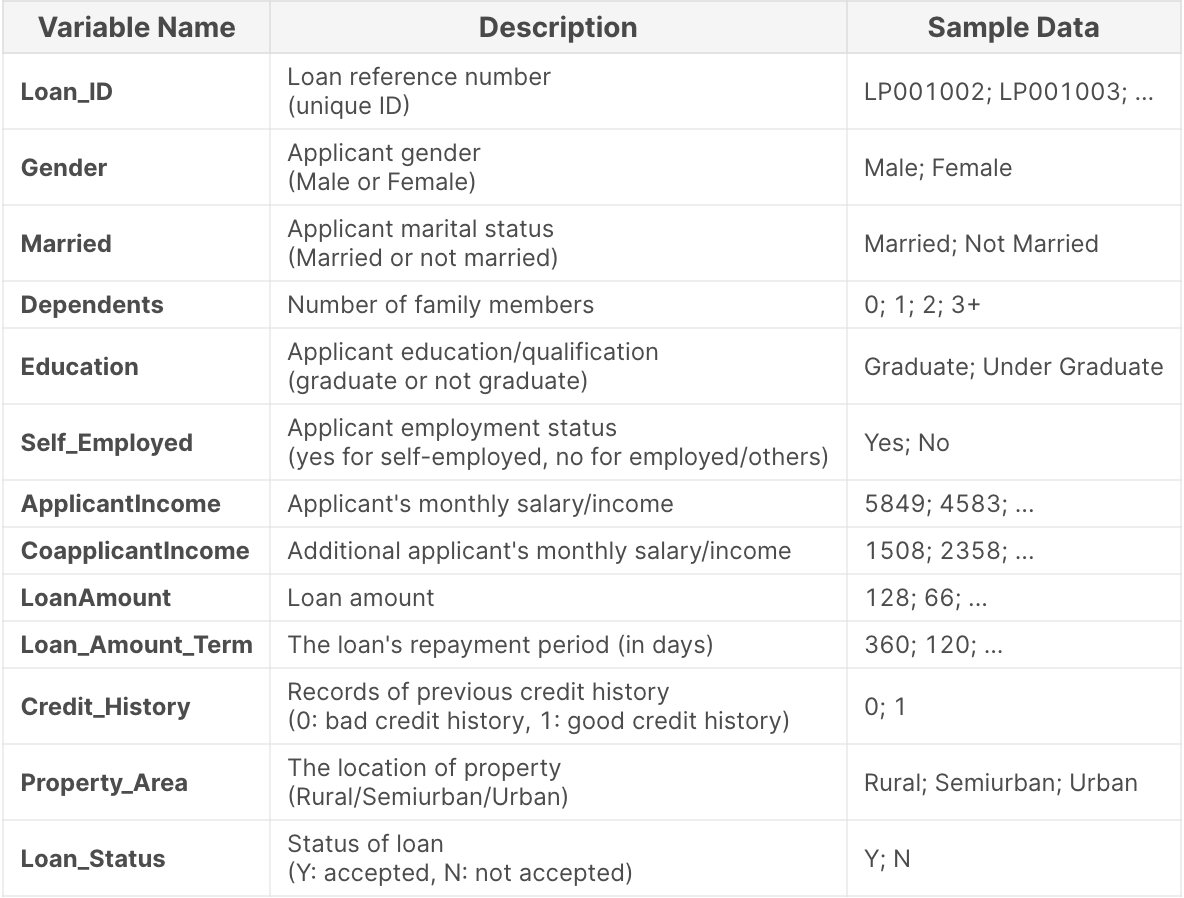

In [ ]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Here,   

Target: **Loan_Status**  
Remaining columns: **Features**  

Based on features --> Predict target.

In [ ]:
# let's look into the datatypes of each feature
data.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

- Here if you can see "**Dependents**" Feature should be an integer as by looking into it we can see it can be 0, 1, 2 .. but It is showing an **Object** datatype.   

- Let's look at why?

In [ ]:
data["Dependents"].value_counts()

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

By doing value counts on the **Dependent** column we get all the counts of values of each row.

By looking can someone tell me now why it is showing Object?  

- Yes, because of the 3**+** sign

Now by looking at a Dataset, we know one thing the "**Loan_ID**" column has no impact on the status of the loan so we can simply remove that column from the dataset.

In [ ]:
data = data.drop('Loan_ID',axis = 1)

In [ ]:
data.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


If we didn't pass any arguments in the describe it'll only return statistics for the numeric features.

Based on the summary statistics for the numerical columns in the dataset we can observe that:

   - The income varies significantly, with the lowest income being `$150`, and the highest being `$81,000`.
   - The majority of applicants have incomes below `$6,000` (75th percentile).
   - Co-applicant incomes range from `$0 to $41,667.`
   - A significant portion of coapplicants has no income (25th percentile).
   - The mean loan amount requested is approximately `$146`, indicating that, on average, applicants seek loans of this amount.
   - The majority of loan terms are for 360 months (30 years).
   - The minimum loan term is 12 months, and the maximum is 480 months.

Now, If you look at "**ApplicantIncome**" the **max** is **81000** So by looking into this we can say that this data right skewed.

We will discuss more about skewness in some time.

In [ ]:
data.describe(include = ['object'])

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,601,611,599,614,582,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,489,398,345,480,500,233,422


Based on the above summary statistics we can observe that:

   - Male applicants significantly outnumber female applicants in the dataset.
   - A significant proportion of applicants are married (398 out of 611).
   - Married applicants are prevalent in the dataset.
   - A substantial portion of applicants has no dependents.
   - Graduates make up a significant portion of the applicant pool.
   - Non-self-employed individuals dominate the dataset.
   - A significant number of applicants are from semiurban areas.
   - The majority of applicants have their loans approved.

In [ ]:
# check for any null values present
data.isna().sum()

Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Now let's store "Categorical" and "Numerical" columns in different variables.

In [ ]:
cat_cols = data.dtypes =='object'
cat_cols = list(cat_cols[cat_cols].index)
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area',
 'Loan_Status']

In [ ]:
num_cols = data.dtypes !='object'
num_cols = list(num_cols[num_cols].index)
num_cols

['ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

Now in "cat_cols" you can see 'Loan_Status' is also there but as we know 'Loan_Status' is a Target so let's remove it from features.

In [ ]:
# Loan_Status is target, so remove from features
cat_cols.remove('Loan_Status')
cat_cols

['Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'Property_Area']

## <font color='blue'>Skewness</font>

Now, let's begin exploring our data.

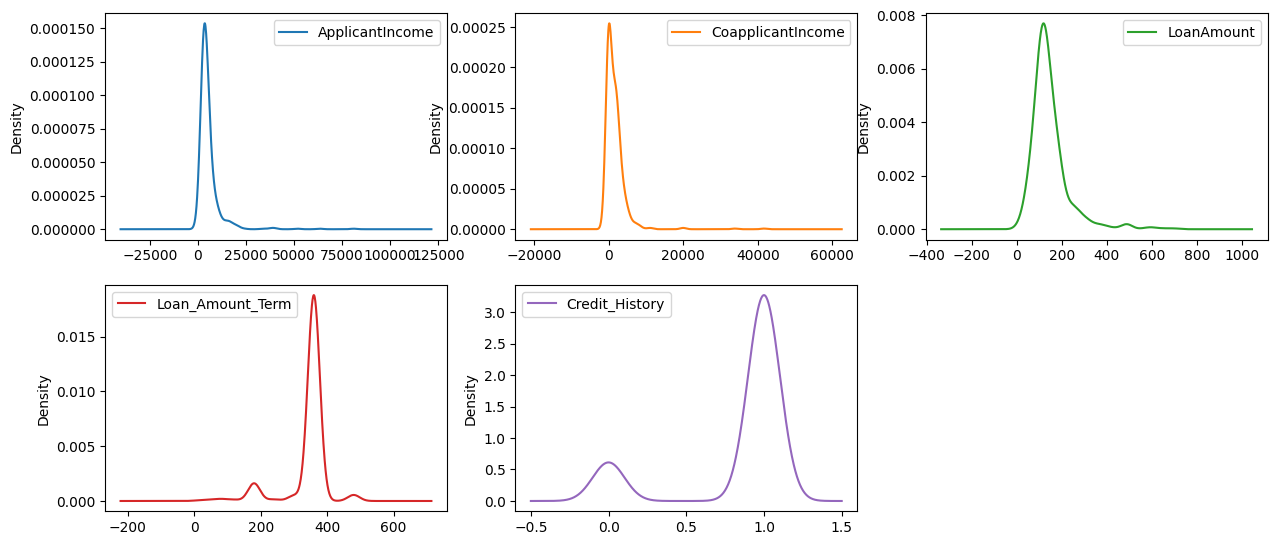

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = [15,10]
data.plot(kind = 'density', subplots = True, layout = (3,3), sharex = False)
plt.show()

<font color='purple'>Skewness is a way to describe the shape of a data distribution or the pattern of how data points are spread out.

It's like looking at the way a hill slopes.</font>

#### <font color='purple'>**Motivation:**</font>

<font color='purple'>**Imagine you're working as a data analyst for a financial institution, and your company processes loan applications.**</font>

- You want to gain insights into the distribution of applicant incomes and its potential impact on the loan approval process.
- To do this, you focus on a specific feature: **"ApplicantIncome."**

Now, the significance of understanding skewness in "ApplicantIncome" becomes apparent.
- Skewness helps uncover patterns in the distribution of income, crucial for assessing the financial profiles of loan applicants.

This is where **skewness** comes into play.

Skewness is valuable for several reasons in the analysis of loan data:

1. **Understanding Income Distribution:**
   - Skewness provides insights into whether there are a few individuals with exceptionally high or low incomes, shaping the distribution of applicant incomes.

2. **Impact on Loan Approval:**
   - The skewed nature of income distribution may influence the loan approval process, as lenders need to be aware of extremes in income levels.

3. **Identifying Outliers:**
   - Skewness helps identify potential outliers in income data, ensuring they are appropriately handled for accurate analyses.

This knowledge is vital for making informed decisions in the financial sector, influencing lending practices, and ensuring the robustness of data analyses.

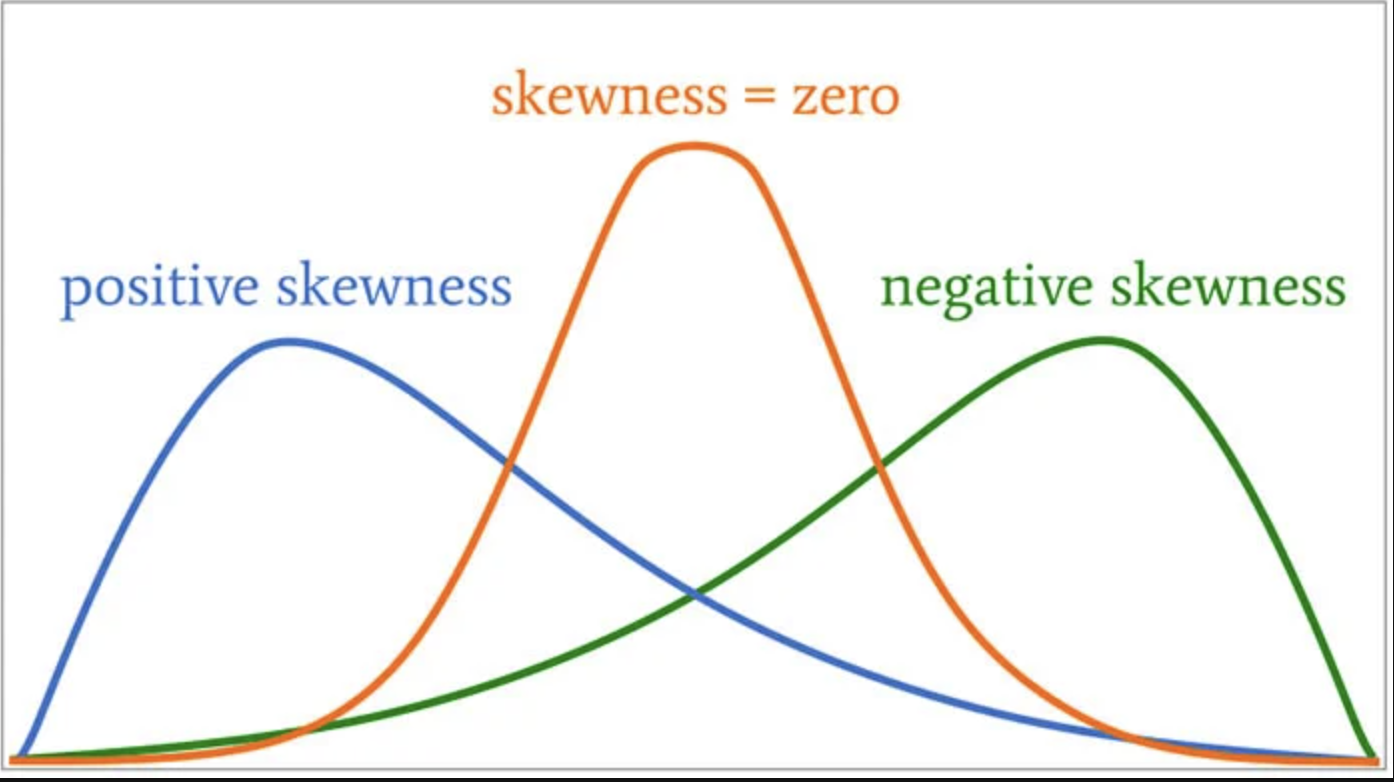

<font color='purple'>**What is Skewness**:</font>

- <font color='orange'>**Symmetrical Data (No Skewness)**:</font> If a distribution is perfectly balanced, with data evenly spread on both sides of the center, it's like a hill with equal slopes on both sides. We call this "symmetrical" or "no skewness."

- <font color='orange'>**Positive Skew (Right Skew)**:</font> When most of the data is on the left side (lower values) and a long tail extends to the right (higher values), it's like a hill that's steeper on the left and has a long, gentle slope on the right.

- <font color='orange'>**Negative Skew (Left Skew)**:</font> When most of the data is on the right side (higher values) and a long tail extends to the left (lower values), it's like a hill that's steeper on the right and has a long, gentle slope on the left.

<font color='purple'>**Why Skewness Matters**:</font>

Skewness is important because it helps us understand the data we're dealing with. It can tell us about things like:

- Where the "typical" or "average" value is.
- Whether there are extreme values far from the average.
- Whether the data tends to be more on one side or the other.

To quantify the skewness

In [ ]:
print(data.skew())

ApplicantIncome      6.539513
CoapplicantIncome    7.491531
LoanAmount           2.677552
Loan_Amount_Term    -2.362414
Credit_History      -1.882361
dtype: float64


1. **Applicant Income and Coapplicant Income:**
   -  These two features have positive skewness. Many applicants and co-applicants have lower incomes, but a few have really high incomes.

2. **Loan Amount:**
   -  Loan amount also has positive skewness. Most loans are smaller, but there are a few that are much larger.

3. **Loan Amount Term:**
   - This feature has negative skewness. It indicates that most loan terms are longer (possibly a standard term), but there might be a few shorter-term loans.

4. **Credit History:**
   - Credit history has negative skewness, suggesting that most applicants have a positive credit history (1), but there might be a few with a negative credit history (0).

In simple terms, positive skewness means there are a few instances with really high values, while negative skewness suggests a few instances with really low values in the dataset.

<font color='purple'>Now, why does this matter for Exploratory Data Analysis?</font>

- **Insight into Distributions:**
  - Skewness helps us understand how data is spread out. It gives a sense of whether most values are concentrated around the average or if there are extremes.

- **Identifying Patterns:**
  - Recognizing skewness helps in identifying patterns within features, like understanding that most loans are smaller but a few are exceptionally large.

- **Data Preparation:**
  - EDA involving skewness guides data preprocessing. For instance, transformations might be applied to make the distribution more suitable for analysis.

- **Decision-Making:**
  - Understanding skewness aids in making decisions based on the concentration of values. For instance, knowing that most applicants have lower incomes but a few have high incomes could influence lending strategies.

> **Why it only returns numerical columns:**

1. **Numerical vs. Categorical:**

- Skewness is a statistical measure applicable to numerical data.  

- Categorical data represents categories or labels, and skewness is not meaningful for such data.  


2. **Interpretability:**

- Skewness is relevant when dealing with continuous or interval data, where the concept of "more" or "less" makes sense.  

- For categorical variables, which are typically represented by labels rather than measurable quantities, skewness doesn't provide meaningful information.  


Same for the kurtosis which we will see later in the lecture.

### Skewness and the Mean, Median and Mode

As we know for **Symmetrical data** (No skewness),
- The mean, median and mode of the data coincide at the same point (the centre of distribution).
- This is because the tails on both sides are mirror images of each other. Hence, there is balance.

<br>

> **Do you think these points will conincide for skewed distribution as well?**

No. Let's consider both cases one by one.

<br>

> **Positive/Right Skewed Distribution**

Here,
- Mode by definition is the point with highest frequency of occurence. Hence it lies corresponding to the **peak of distribution.**
- Further, since the tail on the right-hand side of the distribution is longer or fatter than the left side.
- The distribution is pulled or stretched toward the right.
- As a result, **mean is typically greater than the median.**

This is because:
- The mean is sensitive to extreme values or outliers in the tail.
- The median is less affected by extreme values and provides a better measure of central tendency in skewed distributions.

<br>

Similarly, for

> **Negatively/Left Skewed Distribution**

Here,
- Again, the mode would lie corresponding to the peak
- Since, the tail on the left-hand side of the distribution is longer or fatter than the right side.
- The distribution is pulled or stretched toward the left.
- As a result, **mean is typically less than the median.**


<img src="https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/014/655/original/skeness.jpg?1663009314" alt="skewness" width="600" height="250" />

## <font color='blue'>Kurtosis</font>

Kurtosis is a measure of how peaked or how heavily tailed the data is
- Peaked here means data is less spread out, and more concentrated around the Mean.

Skewness and kurtosis are both measures describes the shape of a distribution, but they focus on different aspects:
- Skewness focuses on the symmetry of the distribution, while kurtosis focuses on the concentration of data in the tails.
- Both measures provide valuable insights into the characteristics of a dataset.
- Both are helpful to see if data follows Normal Distribution or NOT.

#### <font color='purple'>**Motivation:**</font>

<font color='purple'>**Imagine you're a financial analyst working for a lending institution, and you're tasked with analyzing loan data to enhance decision-making.**</font>


1. **Distribution Shape of Loan Amount:**

  - Kurtosis reveals the distribution's shape. Positive kurtosis signals heavier tails and a more peaked center, indicating potential outliers or extreme loan values.  


2. **Impact on Risk Assessment:**

  - Checking kurtosis helps us assess risk. If it's high, it could mean risky situations with loans significantly different from the average.

  - This info is crucial for understanding potential financial risks in loan portfolios.  


3. **Outlier Identification:**

  - Kurtosis helps spot outliers.
  - In loans, outliers could be really big or really small loan amounts.


Understanding kurtosis helps analysts see the distribution pattern of loan amounts and identify any risky or unusual situations.

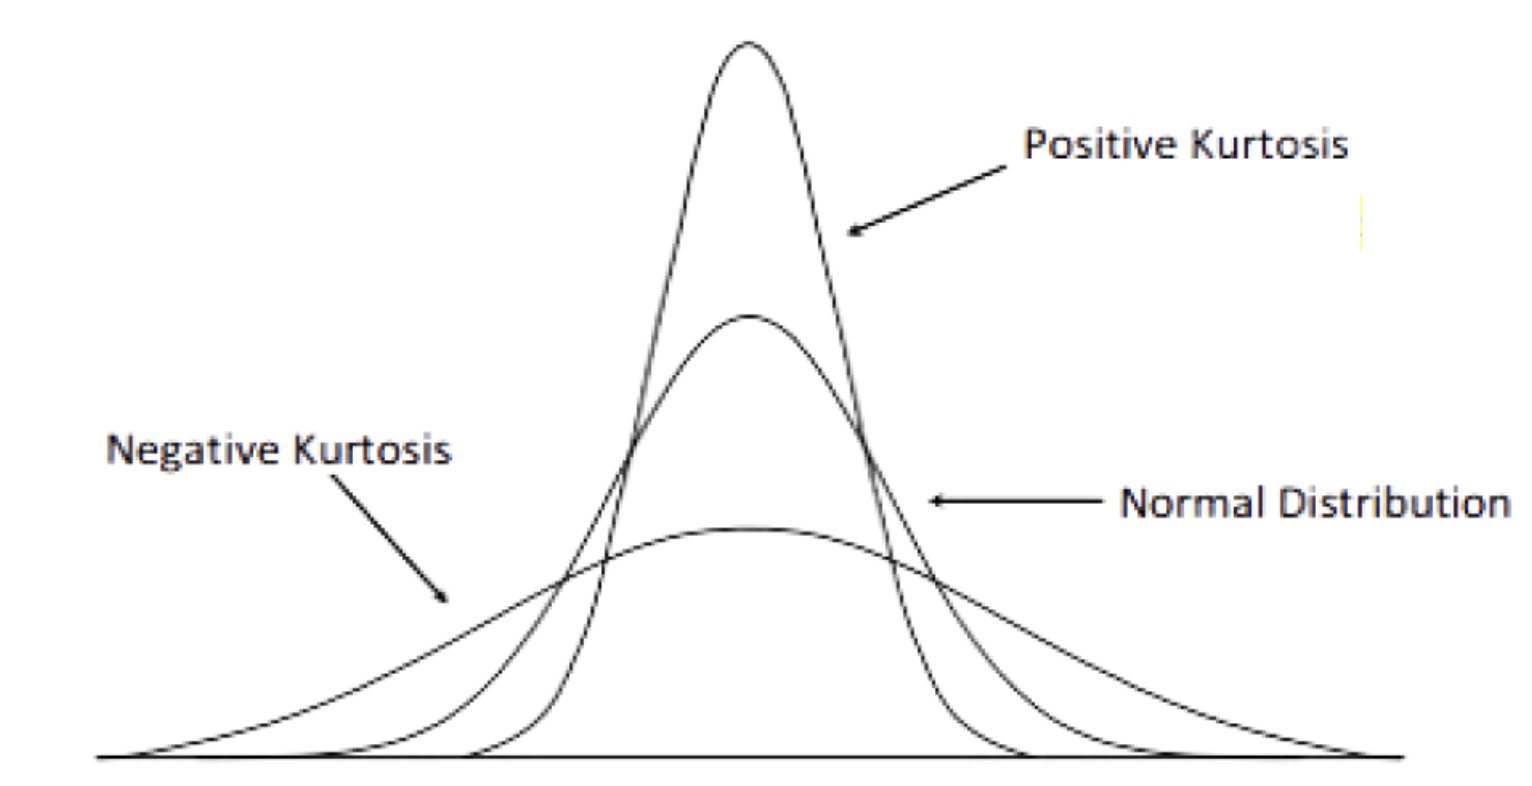

<font color='purple'>**What is Kurtosis:**</font>

Kurtosis is a way of figuring out how "pointy" or "flat" a graph of data is compared to a standard shape.

- <font color='orange'>**Leptokurtic (Pointy):**</font> If a graph is "leptokurtic," it means it's pointier in the middle with long sides. This happens when there are extreme values, making the data bunch up in the middle.

- <font color='orange'>**Mesokurtic (Normal):**</font> A "mesokurtic" graph is like a normal, balanced curve. It's not too pointy or too flat.

- <font color='orange'>**Platykurtic (Flat):**</font> If a graph is "platykurtic," it's flatter in the middle with a flattened peak. This occurs when the data is more spread out without many extreme values.


<font color='purple'>**Why Kurtosis Matters:**

Kurtosis helps us know if our data is normal or not. It helps in:

- **Detecting Outliers:** Spotting data points that are very different from the rest.  

- **Making Predictions:** Understanding if your data follows a typical pattern.

- **Making Decisions:** Knowing if extreme values should be given special attention in analysis.  


So, kurtosis is like a tool that tells us if our data is pointy (leptokurtic), normal (mesokurtic), or flat (platykurtic), giving us insights into the shape and behavior of our data.

In [ ]:
data.kurt()

ApplicantIncome      60.540676
CoapplicantIncome    84.956384
LoanAmount           10.401533
Loan_Amount_Term      6.673474
Credit_History        1.548763
dtype: float64

Here's a simpler way to understand the above kurtosis values:

1. **Applicant and Coapplicant:** Very high positive kurtosis means these distributions have heavy tails with some extreme values—indicating a few individuals with much higher incomes than the rest.
  

2. **Loan Amount:** Positive kurtosis suggests heavy tails with some significantly higher values than the center.  



3. **Loan Amount Term:** Positive kurtosis implies a concentration of data around the mean but with some values noticeably different.
  

4. **Credit History:** Positive kurtosis suggests a distribution with heavy tails, indicating a few applicants with a very different credit history.
  



## <font color='blue'>Univariate Analysis</font>

<font color='purple'>**What is Univariate Analysis?**</font>

Univariate analysis is like taking a closer look at one feature at a time in our data.

Instead of trying to understand everything all at once, we start by checking out plots and counts to learn more about what's in our data.

Now, let's get started with exploring the data one step at a time!

In [ ]:
data['Loan_Status'].value_counts()
target = 'Loan_Status'

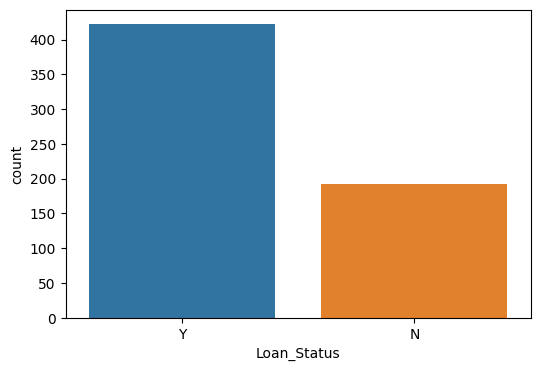

In [ ]:
plt.rcParams["figure.figsize"] = [6,4]
sns.countplot(data=data, x='Loan_Status')
plt.show()

The above plot indicates that a majority of loan applicants have been approved for loans ("Y") in the dataset, with 422 instances.

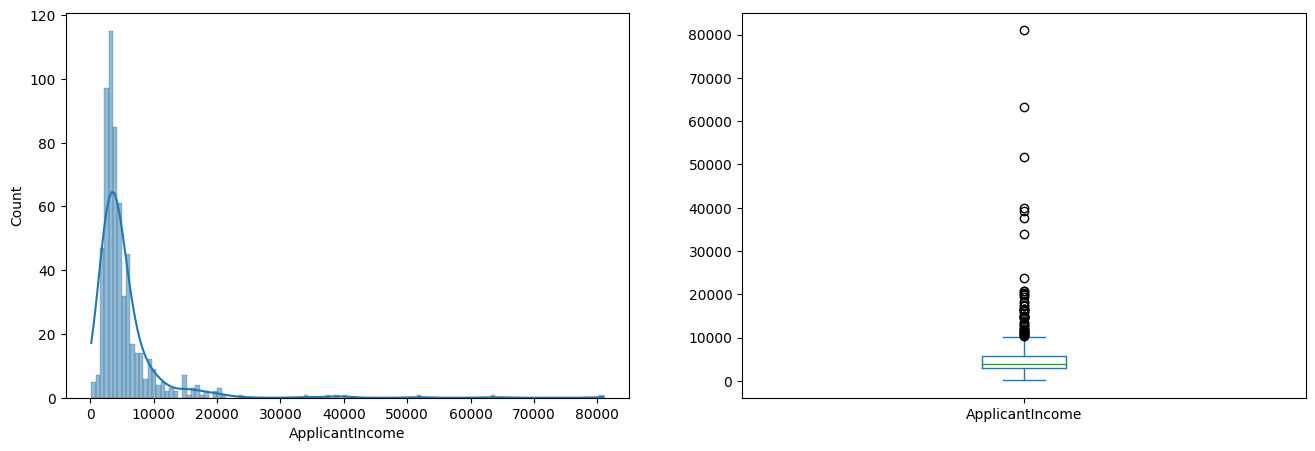

In [ ]:
plt.subplot(121)
sns.histplot(data["ApplicantIncome"], kde=True)

plt.subplot(122)
data["ApplicantIncome"].plot.box(figsize=(16,5))
plt.show()

Here we plotted the histplot in one code and a box plot in another code.  

- Histogram is telling us that data is right skewed means there are some people who are earning far more than most of the people.

- It can be inferred that most of the data in the distribution of applicant income is towards the left which means it is not normally distributed.

- The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society.

Now what we'll do is, we'll take "ApplicantIncome" calculate its mean and groupby it with "**Loan_Status**" column.

In [ ]:
data.groupby("Loan_Status")['ApplicantIncome'].mean()

Loan_Status
N    5446.078125
Y    5384.068720
Name: ApplicantIncome, dtype: float64

<font color='purple'>What do you observe here?  </font>

We can observe that:  
- For those whose Loan gets rejected (N) has higher Income than those whose Loan gets accepted (Y)  
 - Isn't it counterintuitive, what went wrong here?  

If for the first time, we'll see this then we'll expect the opposite of it.  

Think more fundamental here.

"Is the mean statistically significant or not"  

- see like this, go back to the first class. I have a few people from school 1 and a few from school 2.
  - We measure their IQs.  

- The average IQ of 1st school is higher than the Average IQ of 2nd school. Does it significant, no right?  

So to check whether the mean income is significant or not we can check `ttest_ind`.

###### <font color='purple'>ttest_ind</font>

In [ ]:
from scipy.stats import ttest_ind

a = data[data["Loan_Status"]=="Y"]["ApplicantIncome"]
b = data[data["Loan_Status"]=="N"]["ApplicantIncome"]

# H0: Income and Loan status are independent
# Ha: Dependent
ttest_ind(a, b)

TtestResult(statistic=-0.11650844828724542, pvalue=0.907287812130518, df=612.0)

So, by looking at the result of this test and the p-value we can say that   

- p-value is very high --> Loan status and income are independent to each other

- Even though this statement is counterintuitive. we also looked at height and weight examples that how univariate analysis can be sometimes counterintuitive.  

Is there any other way we could've done this data instead of a t-test?
- Sometimes it might be more natural to break a numerical column into categorical columns.

Now, we've learned how to analyze individual features. But what if we have complex data with a wide range of values and numerous categories? To handle such complex data, we can group or bin the information.

## <font color='blue'>**Binning**</font>

<font color='purple'>Binning is like sorting and organizing information into groups. We do this to make it easier to understand and analyze.</font>

Let's take "**ApplicantIncome**" as an example.

<font color='purple'>Why do we need binning for EDA?</font>

- Binning helps simplify the complexity of a large range of income values. Instead of dealing with each individual income, we group them into categories or bins.
- It makes it easier to spot patterns and trends. For instance, it allows us to see how many people fall into different income ranges, providing a clearer picture of the distribution.
  - Binning makes data more interpretable. We can talk about groups like "Low Income," "High Income," etc., making it easier for non-specialists to understand.
 - Bins enable easy comparisons. We can now compare how many people have low, medium, or high incomes without getting lost in the details of individual numbers.


Now, let's create bins for "ApplicantIncome" with specific ranges, and each range gets a label like 'Low' or 'High.'

In [ ]:
bins=[0,2500,4000,6000, 8000, 10000, 20000, 40000, 81000]
group=['Low', 'Average', 'Medium', 'H1', 'H2', 'H3', 'H4', 'Very High']

<font color='purple'>Do you know a method of taking a numeric variable and binning it in a pandas dataframe?</font>
> **`pd.cut()`**


In [ ]:
data['Income_bin']= pd.cut(data['ApplicantIncome'],bins,labels=group)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium


You can see new columns get created and divided into bins.  

Now is the new column numeric or categoric?, categoric right.
- This is what `pd.cut()` does.  

Now let's compare Income_bin and Loan_Status, what will be my setup  
- we can use `pd.crosstab()`

In [ ]:
pd.crosstab(data["Income_bin"],data["Loan_Status"])

Loan_Status,N,Y
Income_bin,,
Low,34,74
Average,67,159
medium,45,98
H1,20,34
h2,9,22
h3,13,27
h4,3,6
Very high,1,2


Now, let's turn these income groups into a plot to make it even easier to understand.

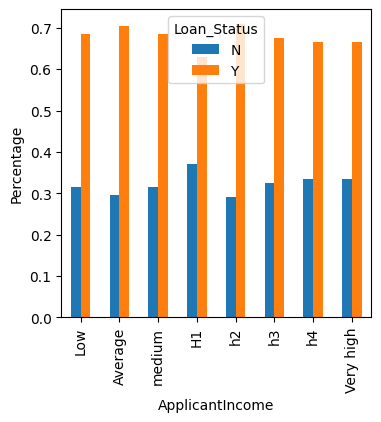

In [ ]:
Income_bin = pd.crosstab(data["Income_bin"],data["Loan_Status"], normalize="index")
Income_bin.plot(kind="bar",figsize=(4,4))
plt.xlabel("ApplicantIncome")
plt.ylabel("Percentage")
plt.show()

It can be inferred that the Applicant income does not affect the chances of loan approval.

We can see that all the bins have almost the same acceptance rate and now we can say that this is more significant.

Now if you want to show your fellow data scientists that there's no significant connection between income and loan status,

<font color='purple'>What hypothesis test you will use? </font>

We would use a method called the <font color='purple'>**chi-square test**</font>.

  - This test is handy when comparing two things that are both categorical, like income categories and loan status.
  - It helps us see if there's any meaningful relationship or if they're independent of each other.

In [ ]:
from scipy.stats import chi2_contingency

val = pd.crosstab(index=data["Income_bin"], columns=data["Loan_Status"]).values
print(val)

# H0: Loan status and Income are independent
chi2_contingency(val) # chi_stat, p_value, df, expected_values

[[ 34  74]
 [ 67 159]
 [ 45  98]
 [ 20  34]
 [  9  22]
 [ 13  27]
 [  3   6]
 [  1   2]]


Chi2ContingencyResult(statistic=1.2420001711303135, pvalue=0.9899274842922701, dof=7, expected_freq=array([[ 33.77198697,  74.22801303],
       [ 70.67100977, 155.32899023],
       [ 44.71661238,  98.28338762],
       [ 16.88599349,  37.11400651],
       [  9.69381107,  21.30618893],
       [ 12.50814332,  27.49185668],
       [  2.81433225,   6.18566775],
       [  0.93811075,   2.06188925]]))

Here also p-value is high so we can say that both are **uncorrelated**.

Why are we doing this all?

To find the feature which is most related to the target so that going forward we can use that feature to predict the target.   

If I find completely unrelated columns it's useless for me like `Loan ID`

In [ ]:
data["TotalIncome"] = data["ApplicantIncome"] + data["CoapplicantIncome"]

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0


Again we can create a total income bin

In [ ]:
bins = [0,3000,5000,8000,81000]
group = ['Low','Average','High','Very High']
data["TotalIncome_bin"] = pd.cut(data["TotalIncome"],bins,labels=group)

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,medium,5849.0,High
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,medium,6091.0,High
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,Average,3000.0,Low
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,Average,4941.0,Average
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,medium,6000.0,High


Now, let's look at the relation between "TotalIncome_bin" and "Loan_Status"





<Axes: xlabel='TotalIncome_bin'>

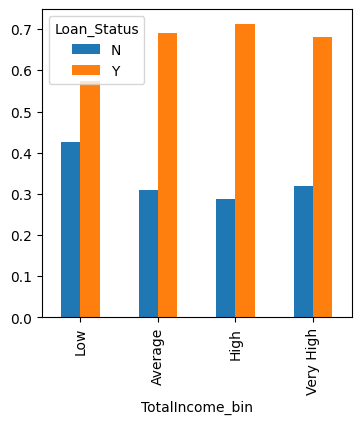

In [ ]:
vals_n = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"], normalize="index")
vals_n.plot(kind="bar",figsize=(4,4))

In [ ]:
vals = pd.crosstab(data["TotalIncome_bin"], data["Loan_Status"])
vals

Loan_Status,N,Y
TotalIncome_bin,,
Low,20,27
Average,69,154
High,61,151
Very High,42,90


This makes sense.

**Observation:**
- We can see that the Proportion of loans getting approved for applicants having low Total_Income is much less as compared to that of applicants with Average, High and Very High Income.

In [ ]:
chi2_contingency(vals) # chi_stat, p-value, dof, expected

Chi2ContingencyResult(statistic=3.428480885250809, pvalue=0.3301570564076713, dof=3, expected_freq=array([[ 14.6970684 ,  32.3029316 ],
       [ 69.73289902, 153.26710098],
       [ 66.29315961, 145.70684039],
       [ 41.27687296,  90.72312704]]))

The P-value is slightly low here but significantly it is still high so despite doing total_income we can find income and loan_status unrelated to each other.  

> Which is still counterintuitive.

## <font color='blue'>**Creating new features**</font>

Creating new features, for example changing "Loan_Amount_Term" to years, is crucial because it simplifies complex information, making it easier to understand.

In this example, converting the loan term into years helps in assessing the duration more intuitively, assisting both borrowers and lenders in their decision-making process.

### <font color='blue'>**Loan Amount Term**</font>

Imagine two people applying for loans:

- The first person earns 20L and applies for a 50L loan.
- The second person earns 30L and applies for a 5CR loan.

Which of these two is more likely to get a loan?
> first person right?


Now, if we only consider salary and loan status, we can realize why this counterintuitive scenario can happen. Hence, **Loan_amount** becomes crucial for us.

- "**Loan_amount**" is vital in the loan approval process as it directly impacts loan approval chances.
- Lenders assess the requested loan amount in relation to the applicant's income to gauge risk and repayment capacity.
    - This consideration is essential for strategic decision-making, providing a holistic view of an individual's financial profile and influencing customized loan offers.

Now, if we consider another column, "**Loan_Amount_Term**":

- "**Loan_Amount_Term**" is important because it indicates how long someone has to repay their loan.
- This duration affects monthly payments (EMIs), affordability, and risk for both borrowers and lenders.
- It also influences interest payments, reflects market conditions, and ensures compliance with regulations.
- Understanding this term is crucial for making informed decisions about loans and financial planning.

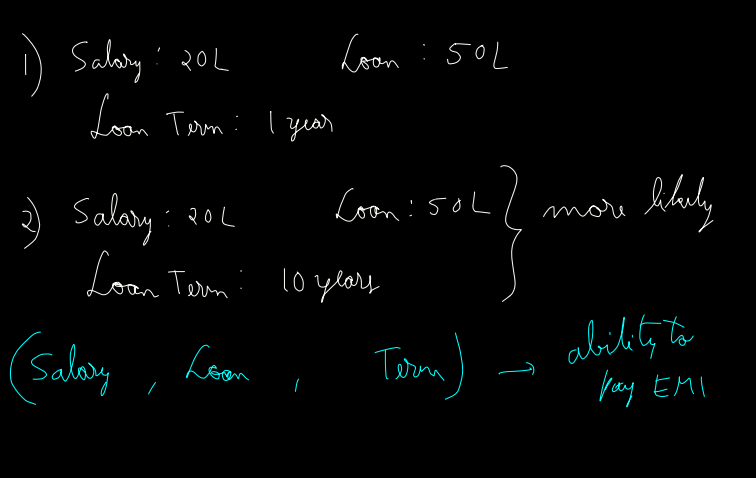

We can assert that if we have all "Salary, Loan Amount and Loan term" then there is a higher chance of predicting the target.

We have all this in our data so let's have a look.

Even though in the original dataset the feature is given as numeric, after looking at the data, we figured out that we can treat it like a categorical variable.

In [ ]:
data['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
data['Loan_Amount_Term'] = (data['Loan_Amount_Term']/12).astype('float')
# Convert to years

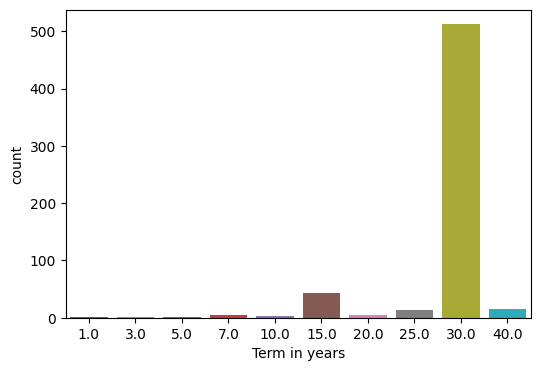

In [ ]:
sns.countplot(x='Loan_Amount_Term', data=data)
plt.xlabel("Term in years")
plt.show()

- We can see that more people are taking 30 years of loan term  

Let's plot the **loan amount** too

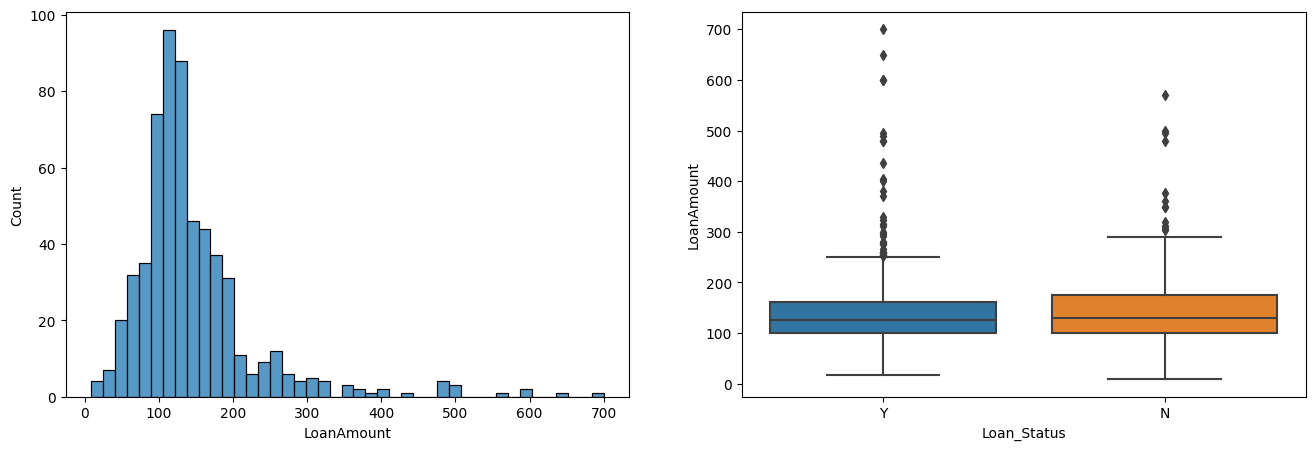

In [ ]:
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.histplot(data['LoanAmount']);

plt.subplot(122)
sns.boxplot(data=data, x='Loan_Status', y = 'LoanAmount')

plt.show()

Here also we can **right-skewed** data.

### <font color='blue'>**Able to pay EMI**</font>

Now, can I say if I could compute if a person is able to pay EMI or not .

<font color='purple'>Can I think of a new feature?</font>

Can we think of a crude estimation of an EMI and based on my domain expertise let's create a new feature?

In [ ]:
data['Loan_Amount_per_year']  = data['LoanAmount']/data['Loan_Amount_Term']
# Crude approximation without interest

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000


Our Loan Amount is in thousands of dollars so we have to calculate EMI also in thousands of dollars.

In [ ]:
data['EMI'] = data['Loan_Amount_per_year']*1000/12 # Crude approximation without interest
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN,NaN
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667


Now, we have "**Salary**" and "**EMI**", how we'll calculate that the person will "**Able to pay EMI**"

- We want EMI to be less than a certain fraction of the Salary.
- How much that's domain knowledge again.


In [ ]:
 # considering 30%
 data['Able_to_pay_EMI'] = (data['TotalIncome']* 0.3 > data['EMI']).astype('int')

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,medium,6000.0,High,4.700000,391.666667,1


Now we have 2 categorical columns to compare "**Loan_Status**" and "**Able_to_pay_EMI**"  

<Axes: xlabel='Able_to_pay_EMI', ylabel='count'>

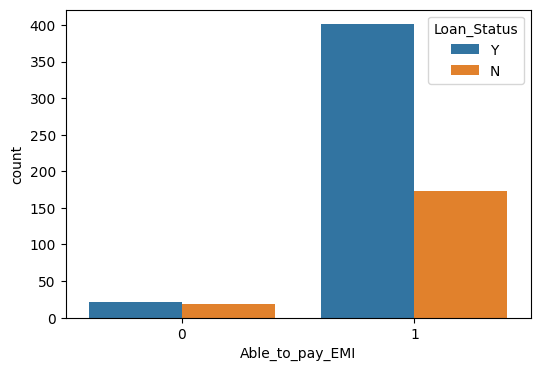

In [ ]:
sns.countplot(x='Able_to_pay_EMI', data = data, hue = 'Loan_Status')

**Observation:**

- There is a 52% chance that you may get the loan approved if you cannot pay the EMI.
- But there, is a 69% chance that you may get the loan approved if you can pay the EMI.

In [ ]:
vals = pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status'])
vals

Loan_Status,N,Y
Able_to_pay_EMI,,
0,19,21
1,173,401


In [ ]:
chi2_contingency(pd.crosstab(data['Able_to_pay_EMI'], data['Loan_Status']))

Chi2ContingencyResult(statistic=4.467271867611989, pvalue=0.03455011506195388, dof=1, expected_freq=array([[ 12.50814332,  27.49185668],
       [179.49185668, 394.50814332]]))

- Here you can see a p-value of 0.03 which we can say has great significance.   

- We can say that **Able_to_pay_EMI** has very relate to **Loan_Status**.  

- You can see this is the art where from the **Salary**, and **Loan term** columns we created a new column "**Able_to_pay_EMI**"  which has a high impact on the target.

---

In [ ]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Income_bin,TotalIncome,TotalIncome_bin,Loan_Amount_per_year,EMI,Able_to_pay_EMI
0,Male,No,0,Graduate,No,5849,0.0,NaN,30.0,1.0,Urban,Y,Medium,5849.0,High,NaN,NaN,0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,30.0,1.0,Rural,N,Medium,6091.0,High,4.266667,355.555556,1
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,30.0,1.0,Urban,Y,Average,3000.0,Low,2.200000,183.333333,1
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,30.0,1.0,Urban,Y,Average,4941.0,Average,4.000000,333.333333,1
4,Male,No,0,Graduate,No,6000,0.0,141.0,30.0,1.0,Urban,Y,Medium,6000.0,High,4.700000,391.666667,1


In [ ]:
# saving the dataframe to CSV file
data.to_csv('updated_loan.csv',index=False)